In [84]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import re  


In [85]:
df = pd.read_csv("Data/Responses.csv") 
df.sample(1)

,Timestamp,Consent of the person.\nAre you willing to share your data to be used for research in infertility factors. This is an anonymous form and will not ask your name or identity. Do you agree?,"If you want to see the results of the analysis, kindly drop your email.",What is your age?,Which country do you live in?,"Are you married? If yes, at what age did you get married?","Do you have children? If yes, at what age did you have them?","If no, at what age do you see yourself as a parent?",How would you describe your sleep patterns?,"On average, how many hours of sleep do you get per night?",...,Have you noticed a drastic increase in weight in recent years?,How often do you consume packaged foods like instant noodles or ready-to-eat meals?,Do you smoke or use any tobacco products?,How frequently do you consume alcoholic beverages?,"Do you use any recreational substances or drugs (cocaine, morphine, marijuana, heroin etc.)?",Do you live in areas near factories that emit smoke or other harmful deposits?,Do you overcome your stress by indulging yourself in junk and fast food?,How often do you have skipping of periods?,Are you taking any contraceptives?,Have you been diagnosed with any reproductive health conditions? If yes then what is it.
28,28/01/2024 20:17:33,I agree,sanikaanande15@gmail.com,20,India,No,No,27,disturbed,3-4 hours,...,No,sometimes,No,rarely,No,No,No,never,No,No


In [86]:
column_names = list(df.columns) 
column_names

['Timestamp',
 'Consent of the person.\nAre you willing to share your data to be used for research in infertility factors. This is an anonymous form and will not ask your name or identity. Do you agree?',
 'If you want to see the results of the analysis, kindly drop your email.',
 ' What is your age?',
 'Which country do you live in?',
 'Are you married? If yes, at what age did you get married?',
 ' Do you have children? If yes, at what age did you have them?',
 ' If no, at what age do you see yourself as a parent?',
 'How would you describe your sleep patterns? ',
 'On average, how many hours of sleep do you get per night?',
 'How would you rate your overall stress level?',
 ' How often do you engage in stress-reducing activities, such as meditation or exercise?',
 'How often do you go out to eat food?',
 ' Have you noticed a drastic increase in weight in recent years?',
 ' How often do you consume packaged foods like instant noodles or ready-to-eat meals?',
 ' Do you smoke or use any

In [87]:
rename = [
    "TimeStamp", 
    "Consent", 
    "SeeResults", 
    "Age", 
    "Country", 
    "MarriedStatus+Age", 
    "Children+Age", 
    "PotentialParentAge",
    "SleepPattern", 
    "SleepHourAverage", 
    "StressLevelRating", 
    "StressReductionActivityFrequency", 
    "OutsideFoodFrequency", 
    "DrasticWeightIncrease", 
    "PackagedFoodFrequency", 
    "SmokeOrTobacco", 
    "Alcohol", 
    "Recreational", 
    "LiveNearToxicity",
    "StressOvercomeFastFood",
    "PeriodSkipFrequency", 
    "ContraceptiveIntake", 
    "Diagnosis",  
]

column_map = {
    old_name: new_name 
    for old_name, new_name in zip(
        column_names, rename
    )
}

column_map

{'Timestamp': 'TimeStamp',
 'Consent of the person.\nAre you willing to share your data to be used for research in infertility factors. This is an anonymous form and will not ask your name or identity. Do you agree?': 'Consent',
 'If you want to see the results of the analysis, kindly drop your email.': 'SeeResults',
 ' What is your age?': 'Age',
 'Which country do you live in?': 'Country',
 'Are you married? If yes, at what age did you get married?': 'MarriedStatus+Age',
 ' Do you have children? If yes, at what age did you have them?': 'Children+Age',
 ' If no, at what age do you see yourself as a parent?': 'PotentialParentAge',
 'How would you describe your sleep patterns? ': 'SleepPattern',
 'On average, how many hours of sleep do you get per night?': 'SleepHourAverage',
 'How would you rate your overall stress level?': 'StressLevelRating',
 ' How often do you engage in stress-reducing activities, such as meditation or exercise?': 'StressReductionActivityFrequency',
 'How often do y

In [88]:
def create_map_df(): 
    return pd.DataFrame({
        "old_name": column_names, 
        "new_name":rename, 
    })
    
mapping = create_map_df()
mapping 

,old_name,new_name
0,Timestamp,TimeStamp
1,Consent of the person.\nAre you willing to sha...,Consent
2,If you want to see the results of the analysis...,SeeResults
3,What is your age?,Age
4,Which country do you live in?,Country
5,"Are you married? If yes, at what age did you g...",MarriedStatus+Age
6,"Do you have children? If yes, at what age did...",Children+Age
7,"If no, at what age do you see yourself as a p...",PotentialParentAge
8,How would you describe your sleep patterns?,SleepPattern
9,"On average, how many hours of sleep do you get...",SleepHourAverage


In [89]:
df.rename(column_map, inplace=True, axis=1)

In [90]:
df.drop(columns=[
    "Consent", # We don't need women's consent
    "TimeStamp", 
    "SeeResults", 
], inplace=True)

In [91]:
df['Diagnosis'].value_counts()

Diagnosis
No                                  98
Polycystic Ovary Syndrome (PCOS)     8
Menstrual Disorders                  8
Infertility                          1
Infertility, No                      1
Infertility, Endometriosis           1
Name: count, dtype: int64

In [92]:
df['Children+Age'] = df['Children+Age'].fillna('No')
df['MarriedStatus+Age'] = df['MarriedStatus+Age'].fillna('No')

def extract_age(status: str): 
    potential_age = re.findall(r'\b\d+\b', str(status)) 
    if potential_age:
        return int(potential_age[0]) 
    else:
        return -1
    
df['ChildrenAtAge'] = df['Children+Age'].apply(extract_age)
df['MarriedAtAge'] = df['MarriedStatus+Age'].apply(extract_age)

In [93]:
df['MarriedAtAge'].value_counts()

MarriedAtAge
-1     73
 27     7
 26     7
 25     6
 22     5
 24     4
 23     4
 20     3
 30     2
 29     1
 39     1
 32     1
 35     1
 34     1
 37     1
Name: count, dtype: int64

In [94]:
df.drop(
    ['MarriedStatus+Age', 
     'Children+Age'], 
    axis=1, 
    inplace=True
)

In [95]:
df['PotentialParentAge'] = df.PotentialParentAge.bfill()
df['PotentialParentAge'] = df.PotentialParentAge.apply(extract_age)

In [96]:
df['Age'] = df['Age'].bfill()
df['Age'] = df.Age.apply(extract_age)

In [97]:
df['Country'] = df['Country'].str.strip()

In [98]:
country_map = {
    'india':'India', 
    'Maharashtra':'India', 
    'INDIA':'India', 
    'Mumbai':'India', 
    'România':'Romania'
}

In [99]:
def reuploadCountry(country : str): 
    if country in list(country_map.keys()):
        return country_map[country]
    else:
        return country 
    
df['Country'] = df.Country.apply(reuploadCountry)
df.Country.value_counts()

Country
India             108
Romania             3
United States       2
Uruguay             1
Germany             1
Austria             1
United Kingdom      1
Name: count, dtype: int64

In [100]:
df.to_csv('Data/NewResponses.csv', index=False)

In [101]:
df.Diagnosis.value_counts()

Diagnosis
No                                  98
Polycystic Ovary Syndrome (PCOS)     8
Menstrual Disorders                  8
Infertility                          1
Infertility, No                      1
Infertility, Endometriosis           1
Name: count, dtype: int64

In [102]:
def convert_labels(diagnosis: str): 
    if diagnosis != "No": 
        return 1
    else: return 0 
    
df['Diagnosis'] = df.Diagnosis.apply(convert_labels)
df

,Age,Country,PotentialParentAge,SleepPattern,SleepHourAverage,StressLevelRating,StressReductionActivityFrequency,OutsideFoodFrequency,DrasticWeightIncrease,PackagedFoodFrequency,SmokeOrTobacco,Alcohol,Recreational,LiveNearToxicity,StressOvercomeFastFood,PeriodSkipFrequency,ContraceptiveIntake,Diagnosis,ChildrenAtAge,MarriedAtAge
0,18,India,28,irregular,5-6 hours,moderate,never,once every month,No,frequently,No,never,No,No,Yes,sometimes,No,0,-1,-1
1,20,India,30,regular,5-6 hours,moderate,rarely,once every week,No,sometimes,No,never,No,No,No,frequently,No,0,-1,-1
2,20,India,29,regular,5-6 hours,moderate,sometimes,once every week,No,sometimes,No,rarely,No,No,Yes,never,No,0,-1,-1
3,100,Uruguay,81,disturbed,3-4 hours,high,never,Everyday,Yes,everyday,Yes,everyday,Yes,Yes,Yes,frequently,Yes,1,18,-1
4,18,India,-1,irregular,5-6 hours,high,frequently,once every week,No,sometimes,No,every month,No,No,No,never,No,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,18,India,28,disturbed,3-4 hours,high,never,once every week,No,frequently,No,never,No,Yes,No,never,No,0,-1,-1
113,16,India,29,regular,5-6 hours,moderate,sometimes,once every month,Yes,sometimes,No,never,No,No,Yes,never,No,0,-1,-1
114,25,India,29,regular,5-6 hours,moderate,frequently,once every week,Yes,rarely,No,never,No,No,Yes,sometimes,No,0,-1,-1
115,38,India,38,regular,7-8 hours,low,frequently,once every month,No,rarely,No,never,No,No,No,never,No,0,-1,37


In [103]:
def fill_age(potentialAge: int): 
    if potentialAge == -1: 
        return 30 
    else: return potentialAge 
    
df['PotentialParentAge'] = df.PotentialParentAge.apply(fill_age)
df 

,Age,Country,PotentialParentAge,SleepPattern,SleepHourAverage,StressLevelRating,StressReductionActivityFrequency,OutsideFoodFrequency,DrasticWeightIncrease,PackagedFoodFrequency,SmokeOrTobacco,Alcohol,Recreational,LiveNearToxicity,StressOvercomeFastFood,PeriodSkipFrequency,ContraceptiveIntake,Diagnosis,ChildrenAtAge,MarriedAtAge
0,18,India,28,irregular,5-6 hours,moderate,never,once every month,No,frequently,No,never,No,No,Yes,sometimes,No,0,-1,-1
1,20,India,30,regular,5-6 hours,moderate,rarely,once every week,No,sometimes,No,never,No,No,No,frequently,No,0,-1,-1
2,20,India,29,regular,5-6 hours,moderate,sometimes,once every week,No,sometimes,No,rarely,No,No,Yes,never,No,0,-1,-1
3,100,Uruguay,81,disturbed,3-4 hours,high,never,Everyday,Yes,everyday,Yes,everyday,Yes,Yes,Yes,frequently,Yes,1,18,-1
4,18,India,30,irregular,5-6 hours,high,frequently,once every week,No,sometimes,No,every month,No,No,No,never,No,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,18,India,28,disturbed,3-4 hours,high,never,once every week,No,frequently,No,never,No,Yes,No,never,No,0,-1,-1
113,16,India,29,regular,5-6 hours,moderate,sometimes,once every month,Yes,sometimes,No,never,No,No,Yes,never,No,0,-1,-1
114,25,India,29,regular,5-6 hours,moderate,frequently,once every week,Yes,rarely,No,never,No,No,Yes,sometimes,No,0,-1,-1
115,38,India,38,regular,7-8 hours,low,frequently,once every month,No,rarely,No,never,No,No,No,never,No,0,-1,37


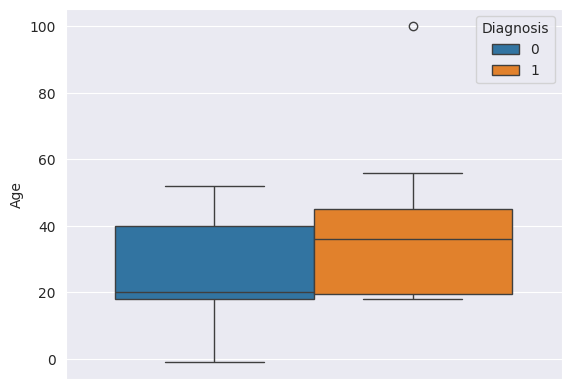

In [104]:
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.boxplot(data = df, y  = "Age", hue='Diagnosis')
plt.show()

In [105]:
def married_status(marriedAge: int): 
    if marriedAge == -1: 
        return 0
    else: return 1 
    
df["IsMarried"] = df.MarriedAtAge.apply(married_status)

pd.crosstab(
    index=df['IsMarried'], 
    columns=df['Diagnosis']
)

Diagnosis,0,1
IsMarried,,
0,63,10
1,35,9


In [106]:
df[df.MarriedAtAge == 22]

,Age,Country,PotentialParentAge,SleepPattern,SleepHourAverage,StressLevelRating,StressReductionActivityFrequency,OutsideFoodFrequency,DrasticWeightIncrease,PackagedFoodFrequency,...,Alcohol,Recreational,LiveNearToxicity,StressOvercomeFastFood,PeriodSkipFrequency,ContraceptiveIntake,Diagnosis,ChildrenAtAge,MarriedAtAge,IsMarried
11,46,India,32,disturbed,5-6 hours,moderate,rarely,once every week,No,sometimes,...,every month,No,Yes,No,never,No,0,26,22,1
42,34,India,25,irregular,7-8 hours,moderate,sometimes,once every month,No,rarely,...,never,No,No,Yes,sometimes,No,1,24,22,1
57,50,India,30,irregular,5-6 hours,low,frequently,once every month,Yes,rarely,...,never,No,No,No,sometimes,No,0,24,22,1
74,40,India,28,regular,5-6 hours,low,rarely,once every month,No,rarely,...,never,No,No,No,never,No,0,24,22,1
106,40,India,23,regular,5-6 hours,low,frequently,once every month,No,rarely,...,never,No,No,No,never,No,0,23,22,1


In [107]:
from sklearn.preprocessing import OneHotEncoder 

object_columns = list(df.select_dtypes(include='object').columns) 

ohe = OneHotEncoder(
    sparse_output=False 
)

x = df[object_columns].values 
cat_value = ohe.fit_transform(x)

categories = []
for category in ohe.categories_: 
    categories.extend(category.tolist())

cat_df = pd.DataFrame(cat_value , columns=categories)

In [108]:
numeric = df.select_dtypes(include=['float', 'int'])
merged_df = pd.concat([cat_df, numeric], axis=1)

merged_df.to_csv("Data/preprocessed_responses.csv", index=False)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 

merged_df = pd.get_dummies(df, drop_first=True) 
X = merged_df.drop('Diagnosis', axis=1)
y = merged_df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

total_samples = len(y_train)
class_0_samples = (y_train == 0).sum()
class_1_samples = (y_train == 1).sum()

weight_for_class_0 = total_samples / (2 * class_0_samples)
weight_for_class_1 = total_samples / (2 * class_1_samples)

class_weights = {0: weight_for_class_0, 1: weight_for_class_1}
dt_classifier = DecisionTreeClassifier(class_weight=class_weights, random_state=42, max_depth=3, criterion='entropy')

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.625


In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        19
           1       0.25      0.40      0.31         5

    accuracy                           0.62        24
   macro avg       0.53      0.54      0.53        24
weighted avg       0.70      0.62      0.65        24



In [111]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0])

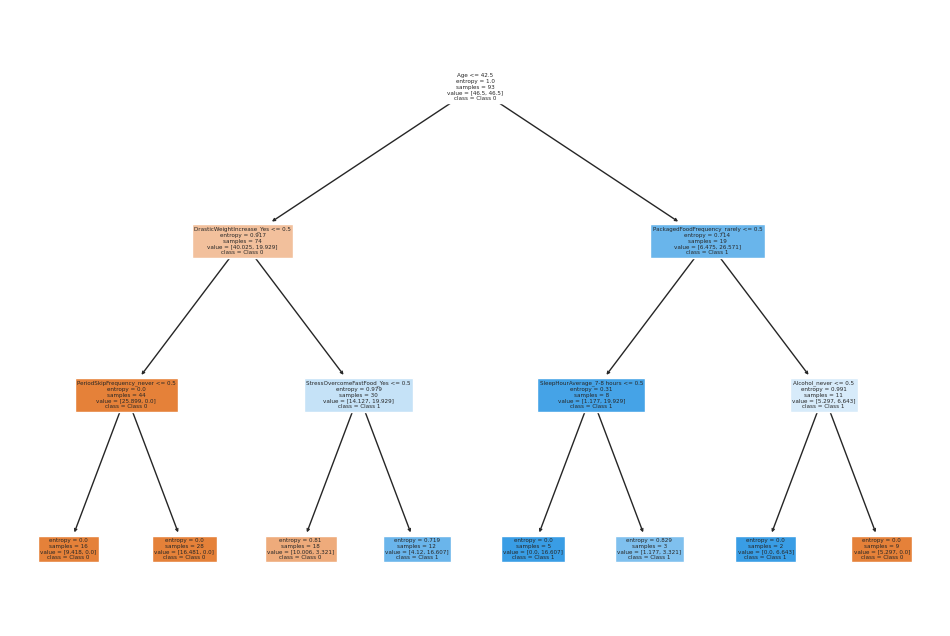

In [112]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

dt_classifier.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()


In [113]:
from sklearn.linear_model import LogisticRegression  
coef_matrix = []
for i in np.linspace(start=0.01, stop=5, num=100): 
    
    model = LogisticRegression(penalty="l1", C=1/i, class_weight=class_weights, solver='liblinear') 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    coefs = model.coef_[0] 
    coefs = coefs.tolist()
    coefs.append(accuracy)
    coef_matrix.append(coefs)
    
weights = pd.DataFrame(coef_matrix, columns=list(X_train.columns)+ ['Accuracy'] ) 
    
     


In [114]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0])

In [115]:
weights.to_csv('Data/column_weights.csv', index=False)

In [116]:
weights 

,Age,PotentialParentAge,ChildrenAtAge,MarriedAtAge,IsMarried,Country_Germany,Country_India,Country_Romania,Country_United Kingdom,Country_United States,...,Alcohol_everyday,Alcohol_never,Alcohol_rarely,Recreational_Yes,LiveNearToxicity_Yes,StressOvercomeFastFood_Yes,PeriodSkipFrequency_never,PeriodSkipFrequency_sometimes,ContraceptiveIntake_Yes,Accuracy
0,0.635367,-0.633343,0.130237,0.348738,-25.608496,0.0,0.0,0.0,0.0,0.0,...,0.0,-5.787861,-6.337442,0.0,-9.032693,0.664982,-8.648138,-1.163896,0.0,0.750000
1,0.360475,-0.359883,0.056499,0.280859,-16.280204,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.040963,-2.760384,0.0,-6.209774,0.226106,-4.485931,-0.336814,0.0,0.750000
2,0.263657,-0.260163,0.043740,0.200219,-11.721347,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.511335,-2.273305,0.0,-5.230998,0.083234,-3.445797,0.000000,0.0,0.750000
3,0.209384,-0.202667,0.033872,0.142013,-8.678193,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.226295,-2.054693,0.0,-4.594284,0.021093,-2.999167,0.000000,0.0,0.750000
4,0.172796,-0.164592,0.026614,0.088100,-6.169549,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.192061,-2.054694,0.0,-4.112348,0.027742,-2.742505,0.000000,0.0,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.071161,-0.064527,-0.013001,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,-0.278181,0.000000,0.0,0.583333
96,0.071015,-0.064334,-0.013003,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,-0.269312,0.000000,0.0,0.583333
97,0.070875,-0.064146,-0.013008,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,-0.260454,0.000000,0.0,0.583333
98,0.070737,-0.063961,-0.013011,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,-0.251620,0.000000,0.0,0.583333


In [117]:
important_weights = weights.loc[weights['Accuracy'] == 0.7083333333333334].iloc[-1, :]

In [118]:
columns = important_weights[important_weights != 0].reset_index().rename(
    {"index": "relevant_columns", 
     "23": "weights_assigned"}, 
    axis=1, 
)

In [119]:
columns.to_csv("Data/ImportantColumns.csv", index=False)

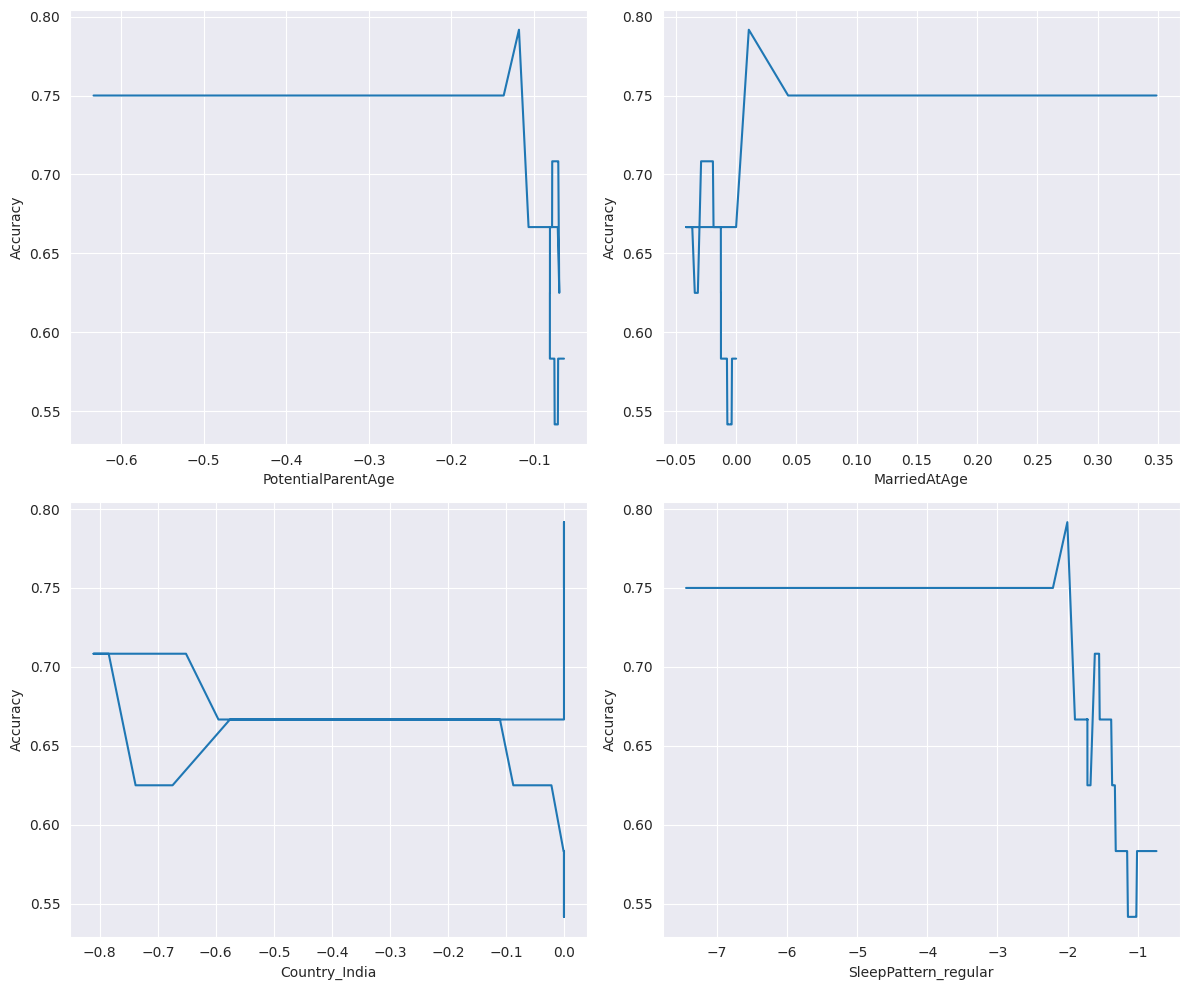

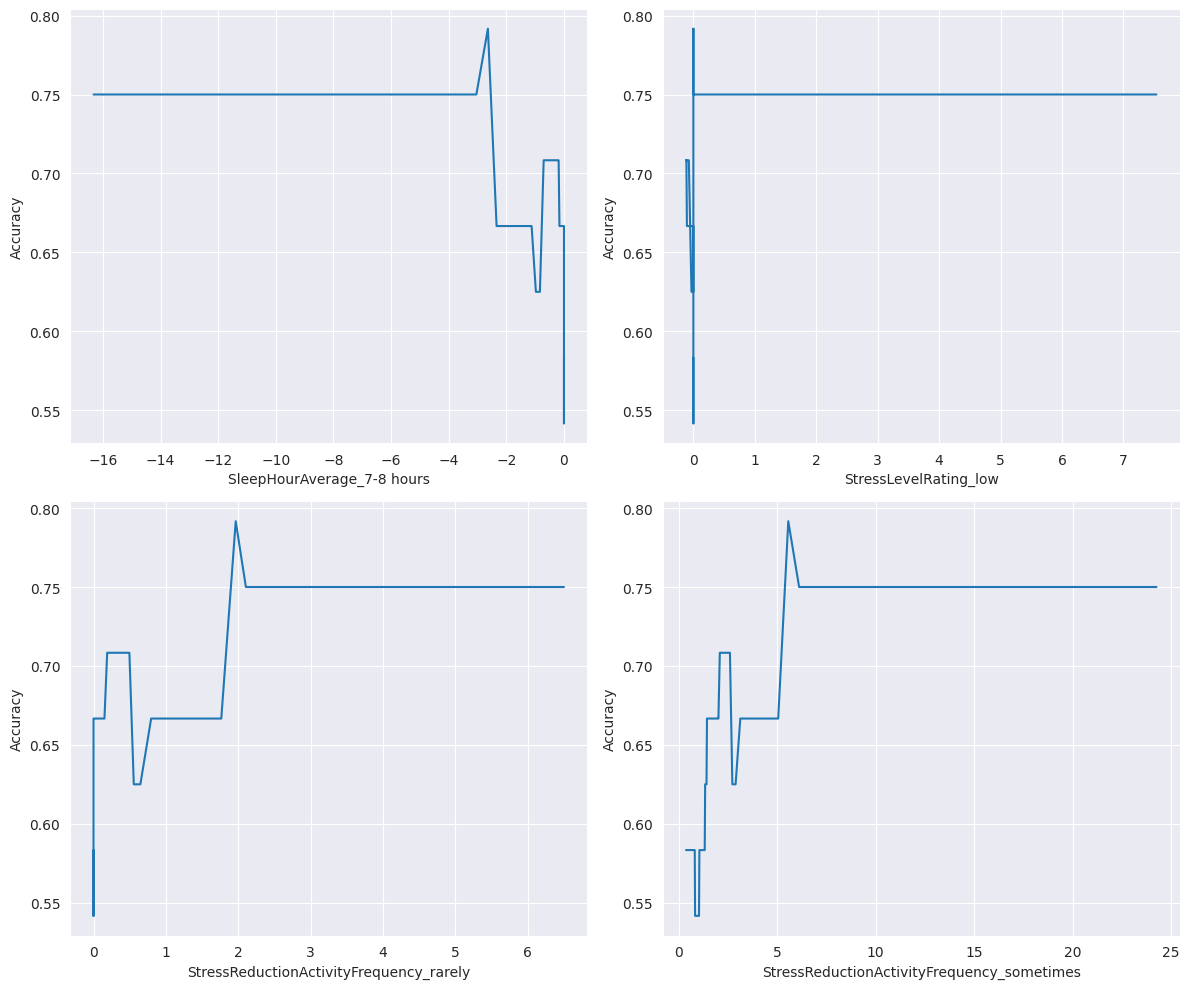

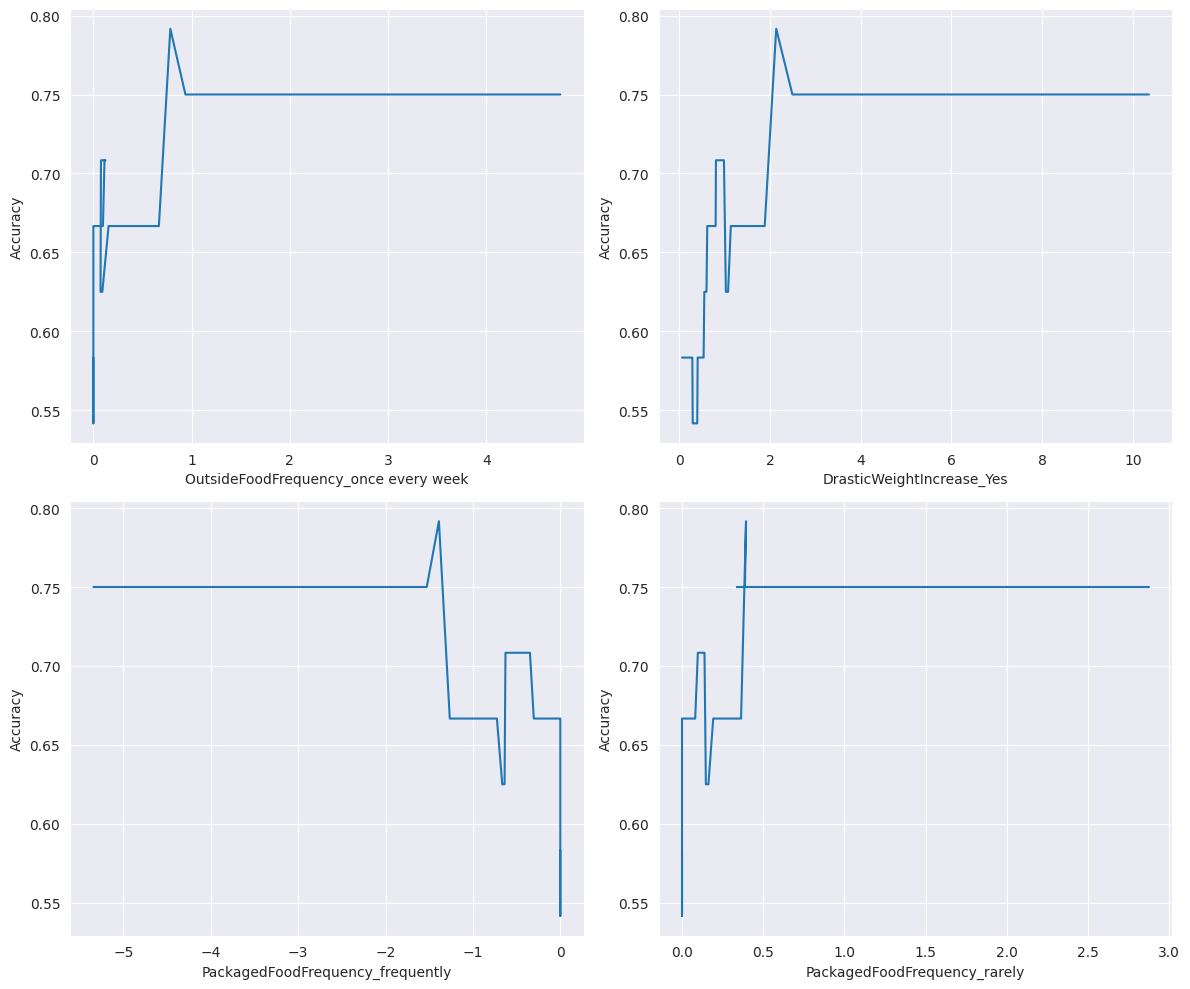

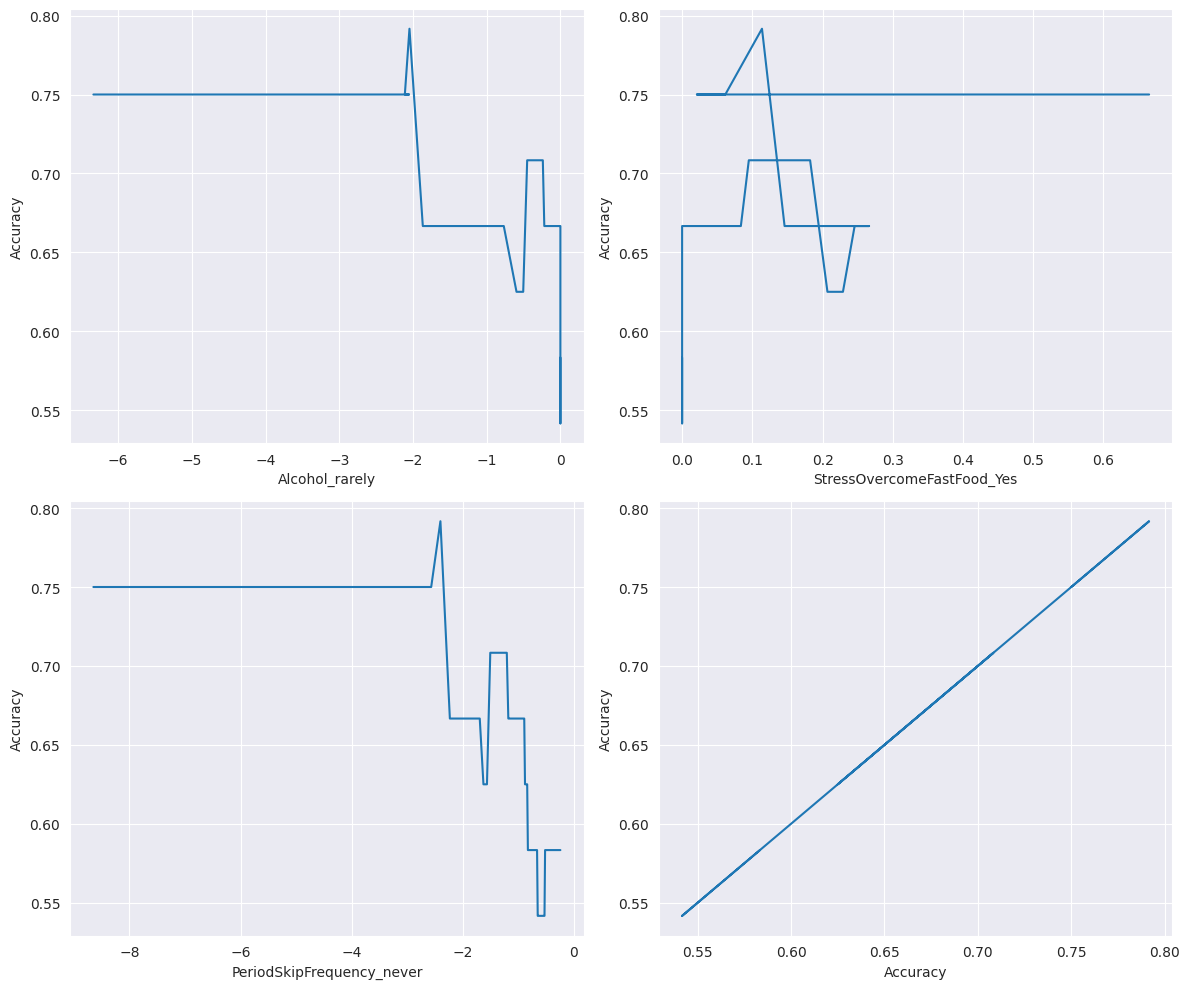

In [120]:
imp_col = columns.relevant_columns.values.tolist()

sns.set_style('darkgrid')

for idx in range(0, 16, 4): 

    plt.figure(figsize=(12, 10)) 
    for fig_no in range(1, 5) :     

        plt.subplot(2, 2, fig_no)
        col_name = imp_col[idx+fig_no]
        plt.plot(weights[col_name], weights['Accuracy'])
        plt.xlabel(col_name)
        plt.ylabel('Accuracy')
        plt.tight_layout()
    
    plt.savefig(f'Images/{idx}-{idx+4}.png')     
    plt.show()
        
    

In [121]:
for i in range(0, 16, 4): 
    print(i)

0
4
8
12


In [122]:
from xgboost import XGBClassifier 

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

0.7083333333333334
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        19
           1       0.00      0.00      0.00         5

    accuracy                           0.71        24
   macro avg       0.39      0.45      0.41        24
weighted avg       0.61      0.71      0.66        24



In [123]:
remove = ["Accuracy", "PotentialParentAge", "Country_India"]
imp_col = list(set(imp_col) - set(remove))
imp_col = list(set([col.split("_")[0] for col in imp_col]))  

In [126]:
from scipy.stats import chi2_contingency
from IPython.display import display, HTML 

categorical = imp_col.copy()
categorical.remove("MarriedAtAge")
categorical.remove("Age")


for column in categorical:
    contingency_table = pd.crosstab(df[column], df['Diagnosis'])

    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    expected = pd.DataFrame(expected, index=list(contingency_table.index), columns=[0, 1])

    results = pd.DataFrame({
        "parameter": [
            "Test Column",
            "Chi2-Statistic",
            "P-Value",
            "Degrees of Freedom",
        ],

        "Values": [
            column,
            chi2_stat,
            p_value,
            dof,
        ]
    })
    
    print("-"*100)
    print(column) 
    print("-"* 100)

    
    print("Observed values:")
    display(contingency_table)
    print("Expected Values:")
    display(expected)
    print("Results of Chi Square:") 
    
    display(results)

    contingency_table.to_excel(f"ChiSquare/{column}_observed.xlsx")
    expected.to_excel(f"ChiSquare/{column}_expected.xlsx")
    results.to_excel(f"ChiSquare/{column}_results.xlsx") 
    print("\n")

----------------------------------------------------------------------------------------------------
SleepHourAverage
----------------------------------------------------------------------------------------------------
Observed values:


Diagnosis,0,1
SleepHourAverage,,
3-4 hours,8,5
5-6 hours,58,9
7-8 hours,32,5


Expected Values:


,0,1
3-4 hours,10.888889,2.111111
5-6 hours,56.119658,10.880342
7-8 hours,30.991453,6.008547


Results of Chi Square:


,parameter,Values
0,Test Column,SleepHourAverage
1,Chi2-Statistic,5.309727
2,P-Value,0.070308
3,Degrees of Freedom,2




----------------------------------------------------------------------------------------------------
StressLevelRating
----------------------------------------------------------------------------------------------------
Observed values:


Diagnosis,0,1
StressLevelRating,,
high,19,7
low,13,3
moderate,66,9


Expected Values:


,0,1
high,21.777778,4.222222
low,13.401709,2.598291
moderate,62.820513,12.179487


Results of Chi Square:


,parameter,Values
0,Test Column,StressLevelRating
1,Chi2-Statistic,3.246876
2,P-Value,0.19722
3,Degrees of Freedom,2




----------------------------------------------------------------------------------------------------
OutsideFoodFrequency
----------------------------------------------------------------------------------------------------
Observed values:


Diagnosis,0,1
OutsideFoodFrequency,,
Everyday,9,1
Once a year,4,0
once every month,45,9
once every week,40,9


Expected Values:


,0,1
Everyday,8.376068,1.623932
Once a year,3.350427,0.649573
once every month,45.230769,8.769231
once every week,41.042735,7.957265


Results of Chi Square:


,parameter,Values
0,Test Column,OutsideFoodFrequency
1,Chi2-Statistic,1.232092
2,P-Value,0.745318
3,Degrees of Freedom,3




----------------------------------------------------------------------------------------------------
StressReductionActivityFrequency
----------------------------------------------------------------------------------------------------
Observed values:


Diagnosis,0,1
StressReductionActivityFrequency,,
frequently,26,2
never,14,3
rarely,32,6
sometimes,26,8


Expected Values:


,0,1
frequently,23.452991,4.547009
never,14.239316,2.760684
rarely,31.829060,6.170940
sometimes,28.478632,5.521368


Results of Chi Square:


,parameter,Values
0,Test Column,StressReductionActivityFrequency
1,Chi2-Statistic,3.062162
2,P-Value,0.38214
3,Degrees of Freedom,3




----------------------------------------------------------------------------------------------------
PackagedFoodFrequency
----------------------------------------------------------------------------------------------------
Observed values:


Diagnosis,0,1
PackagedFoodFrequency,,
everyday,3,1
frequently,25,3
rarely,34,7
sometimes,36,8


Expected Values:


,0,1
everyday,3.350427,0.649573
frequently,23.452991,4.547009
rarely,34.341880,6.658120
sometimes,36.854701,7.145299


Results of Chi Square:


,parameter,Values
0,Test Column,PackagedFoodFrequency
1,Chi2-Statistic,0.997091
2,P-Value,0.801956
3,Degrees of Freedom,3




----------------------------------------------------------------------------------------------------
StressOvercomeFastFood
----------------------------------------------------------------------------------------------------
Observed values:


Diagnosis,0,1
StressOvercomeFastFood,,
No,72,9
Yes,26,10


Expected Values:


,0,1
No,67.846154,13.153846
Yes,30.153846,5.846154


Results of Chi Square:


,parameter,Values
0,Test Column,StressOvercomeFastFood
1,Chi2-Statistic,3.938138
2,P-Value,0.047203
3,Degrees of Freedom,1




----------------------------------------------------------------------------------------------------
DrasticWeightIncrease
----------------------------------------------------------------------------------------------------
Observed values:


Diagnosis,0,1
DrasticWeightIncrease,,
No,62,9
Yes,36,10


Expected Values:


,0,1
No,59.470085,11.529915
Yes,38.529915,7.470085


Results of Chi Square:


,parameter,Values
0,Test Column,DrasticWeightIncrease
1,Chi2-Statistic,1.085219
2,P-Value,0.297533
3,Degrees of Freedom,1




----------------------------------------------------------------------------------------------------
Alcohol
----------------------------------------------------------------------------------------------------
Observed values:


Diagnosis,0,1
Alcohol,,
every month,8,2
every week,1,1
everyday,0,1
never,64,13
rarely,25,2


Expected Values:


,0,1
every month,8.376068,1.623932
every week,1.675214,0.324786
everyday,0.837607,0.162393
never,64.495726,12.504274
rarely,22.615385,4.384615


Results of Chi Square:


,parameter,Values
0,Test Column,Alcohol
1,Chi2-Statistic,8.509553
2,P-Value,0.074598
3,Degrees of Freedom,4




----------------------------------------------------------------------------------------------------
PeriodSkipFrequency
----------------------------------------------------------------------------------------------------
Observed values:


Diagnosis,0,1
PeriodSkipFrequency,,
frequently,7,5
never,67,5
sometimes,24,9


Expected Values:


,0,1
frequently,10.051282,1.948718
never,60.307692,11.692308
sometimes,27.641026,5.358974


Results of Chi Square:


,parameter,Values
0,Test Column,PeriodSkipFrequency
1,Chi2-Statistic,13.230477
2,P-Value,0.00134
3,Degrees of Freedom,2




----------------------------------------------------------------------------------------------------
SleepPattern
----------------------------------------------------------------------------------------------------
Observed values:


Diagnosis,0,1
SleepPattern,,
disturbed,13,5
irregular,24,7
regular,61,7


Expected Values:


,0,1
disturbed,15.076923,2.923077
irregular,25.965812,5.034188
regular,56.957265,11.042735


Results of Chi Square:


,parameter,Values
0,Test Column,SleepPattern
1,Chi2-Statistic,4.445265
2,P-Value,0.108324
3,Degrees of Freedom,2


In [42]:
from scipy.stats import f_oneway 

def annova_for_column(categorical, numerical): 
    values = []
    
    for group in df.groupby(categorical)[numerical]:
        values.append(group[1].values) 
    
    f_statistic, p_value = f_oneway(*values)
    print(f"P-Value: {p_value}")
    print(f"f-statistic: {f_statistic}")
    
    result = pd.DataFrame(
        {
            "parameters": [
                "P-Value", 
                "F-statistic"
            ], 
            
            "Statistic": [
                p_value, 
                f_statistic, 
            ]
        }
    )
    
    display(result)
    
    return result 

In [43]:
result = annova_for_column("Diagnosis", "Age")

P-Value: 0.0060541644076844625
f-statistic: 7.821245682527451


,parameters,Statistic
0,P-Value,0.006054
1,F-statistic,7.821246


In [44]:
result = annova_for_column("Diagnosis", "MarriedAtAge")

P-Value: 0.24827980064557664
f-statistic: 1.3465824252368988


,parameters,Statistic
0,P-Value,0.248280
1,F-statistic,1.346582


In [47]:
ages = df[df.Diagnosis == 1].Age.values[1:]
mean = np.mean(ages)
stdev = np.std(ages)

mean + 3 * stdev 

71.19323264248146

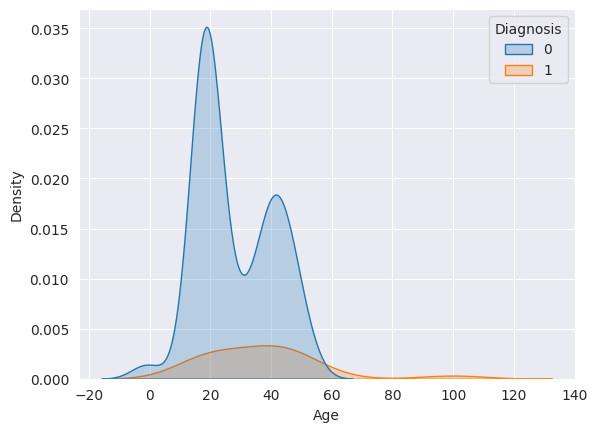

In [61]:
sns.kdeplot(data=df, x="Age", fill=True, hue="Diagnosis")  
plt.show()

<Axes: ylabel='Density'>

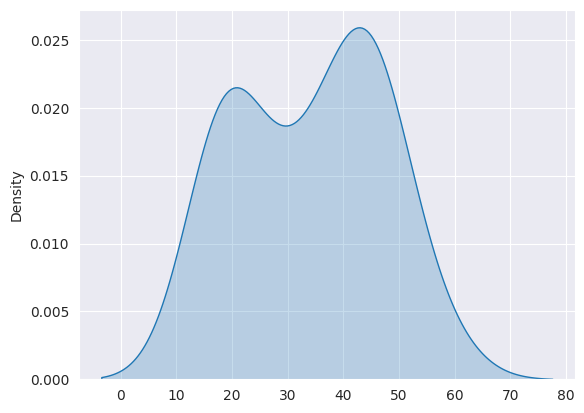

In [62]:
sns.kdeplot(ages, fill=True)

In [63]:
imp_col

['SleepHourAverage',
 'StressLevelRating',
 'OutsideFoodFrequency',
 'MarriedAtAge',
 'StressReductionActivityFrequency',
 'Age',
 'PackagedFoodFrequency',
 'StressOvercomeFastFood',
 'DrasticWeightIncrease',
 'Alcohol',
 'PeriodSkipFrequency',
 'SleepPattern']

In [70]:
from scipy.stats import f_oneway
groups = []
for parameter in df.groupby(["DrasticWeightIncrease", "Diagnosis"])["Age"]: 
    groups.append(parameter[1])

f_statistic, p_value = f_oneway(*groups) 

result = pd.DataFrame({
    "parameters":[
        "P-Value", 
        "F-Statistic", 
    ], 
    "Value":[
        p_value, 
        f_statistic, 
    ]
})

result

,parameters,Value
0,P-Value,0.046803
1,F-Statistic,2.737318


In [82]:
imp_col.append("Diagnosis")

<Axes: >

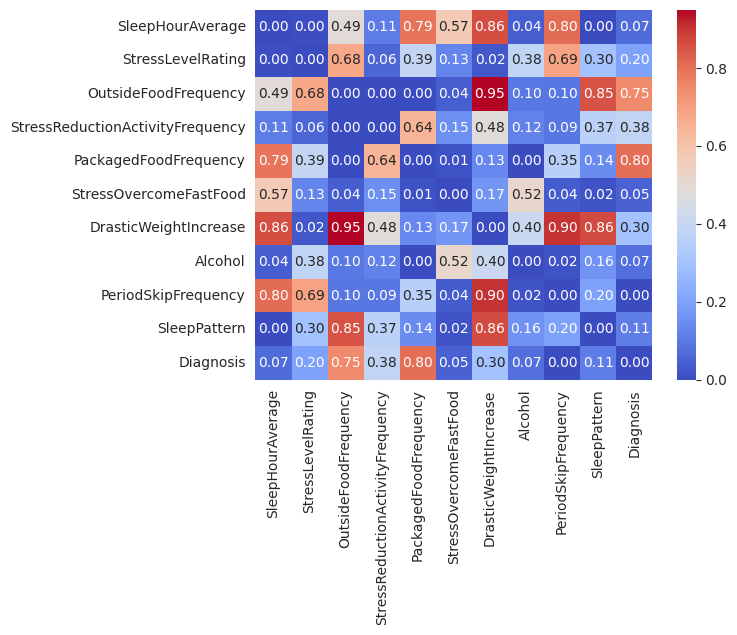

In [83]:


def make_pval_matrix(columns: list): 
    p_val_matrix = []  
    for comparable_columns in columns:
        p_col = [] 
        for target in columns: 
            
            source_col = df[comparable_columns]
            target_col = df[target]
            observed = pd.crosstab(source_col, target_col)
            
            chi2_stat, p_value, ddof, expected = chi2_contingency(observed)
            p_col.append(p_value)
        p_val_matrix.append(p_col)
    
    matrix = pd.DataFrame(p_val_matrix, columns=columns, index=columns)
    return matrix 

mat = make_pval_matrix(imp_col)
sns.heatmap(mat, cmap="coolwarm", annot=True, fmt=".2f")  
